# INSURANCE CHARGES PREDICTION (REGRESSION)    

<b>Introduction:</b>
In this project, we have insurance data which contains 7 features. Six of them define person's Age, Gender, BMI, Children, Smoker, Region. Whereas the 7th and the target function is the Insurance Charges that he/she has to pay. Here we have ignored the "region" factor because it seems inappropriate if we focus on general purpose. The algorithm that we have used here is the unique Gaussian Process Regressor (GPR).  

--------

<b>Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

<b>Reading And Printing Data</b>

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data = data.drop("region",axis=1)

In [4]:
data.tail()

,age,sex,bmi,children,smoker,charges
1333,50,male,30.97,3,no,10600.5483
1334,18,female,31.92,0,no,2205.9808
1335,18,female,36.85,0,no,1629.8335
1336,21,female,25.80,0,no,2007.9450
1337,61,female,29.07,0,yes,29141.3603


<b>Some Data Descriptions</b>

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


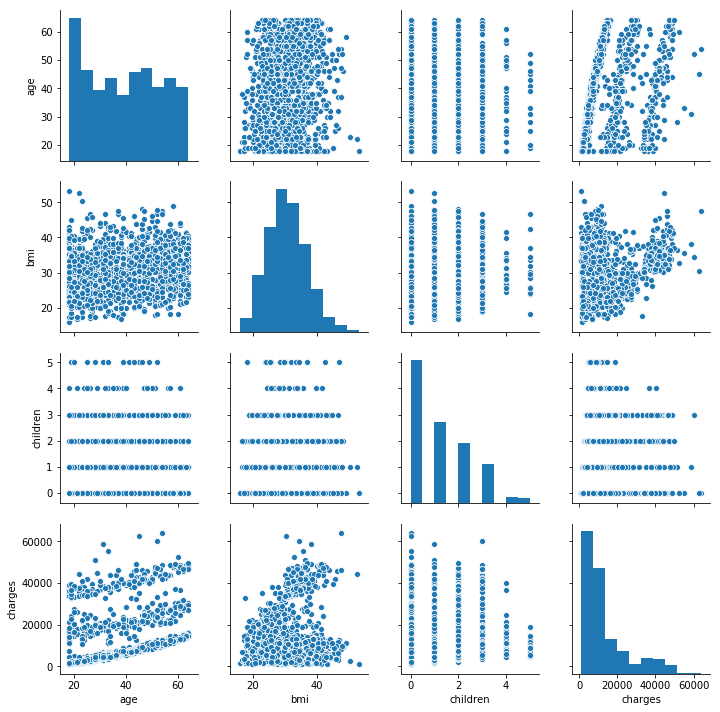

In [8]:
sns.pairplot(data)
plt.show()

<b>Encoding The Nominals</b>

In [9]:
nominals = ["smoker","sex"]
lbe = LabelEncoder()
for i in nominals:
    encode = lbe.fit_transform(data[i])
    data.replace(to_replace = data[i].tolist(), value=encode, inplace=True)

In [10]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


<b>Making X And Y Sets (Train & Test)</b>

In [11]:
X = data[["age","sex","bmi","children","smoker"]]
y = data["charges"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.98, random_state=5)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1311, 5)
(1311,)
(27, 5)
(27,)


<b>Building GPR Model & Fitting Train Sets</b>

In [14]:
k = DotProduct(sigma_0 = 3.0)

model = GaussianProcessRegressor(kernel=k, random_state=5, alpha=4.0)

In [15]:
model.fit(x_train, y_train)

GaussianProcessRegressor(alpha=4.0, copy_X_train=True,
             kernel=DotProduct(sigma_0=3), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b', random_state=5)

<b>Predicting X Test Sets</b>

In [16]:
y_pred = model.predict(x_test)

In [29]:
dict_result = {"Actual Y": y_test, "Predicted Y": y_pred}
result = pd.DataFrame(data=dict_result).reset_index(drop=True)
result

,Actual Y,Predicted Y
0,2203.47185,2401.7500
1,18648.42170,27127.5000
2,11305.93455,11280.1250
3,2166.73200,5328.6875
4,5245.22690,8547.9375
5,48885.13561,34951.3750
6,8068.18500,12210.7500
7,19749.38338,11268.2500
8,3238.43570,8555.0625
9,9869.81020,10899.8750


<b>Analyzing Results & Metrics</b>

In [19]:
mse = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error:",mse)
print("Accuracy:",score*100)

Mean Absolute Error: 3984.413053703704
Accuracy: 80.69040387817282


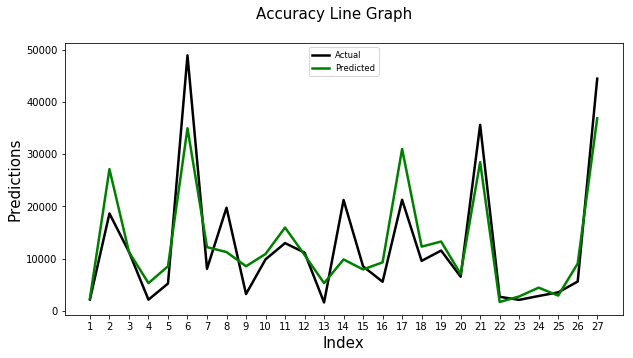

In [20]:
c = [i for i in range(1,28)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="k", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="g", linewidth=2.5, linestyle="-")
fig.suptitle("Accuracy Line Graph", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Predictions", fontsize=15)
plt.legend(labels=["Actual","Predicted"], loc=9, fontsize="small")
plt.xticks(np.arange(1,28),c)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'fill'
  s)


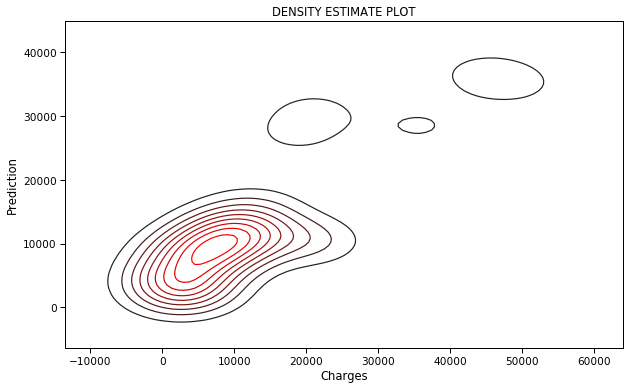

In [31]:
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.2)
sns.kdeplot(data=y_test, data2=y_pred, fill=True, color="red")
plt.xlabel("Charges")
plt.ylabel("Prediction")
plt.title("DENSITY ESTIMATE PLOT")
plt.show()

----------

<b>Conclusion:</b>
After applying the Gaussian Process Regressor on our insurance data, we've got accuracy of the model as 80.69. The results are deviated in thousands which implies that a careful Hyper-parameter Tuning is required.  